In [1]:
import fbprophet

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


pd.read_csv('/content/gdrive/My Drive/sample data/sample.csv')


In [3]:
import pandas as pd
import numpy as np



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import datetime

In [41]:
saleTrainDf = pd.read_csv('/content/gdrive/My Drive/MLProjects/6RealLife/Sales/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [9]:
saleTrainDf.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
saleTrainDf.shape

(1017209, 9)

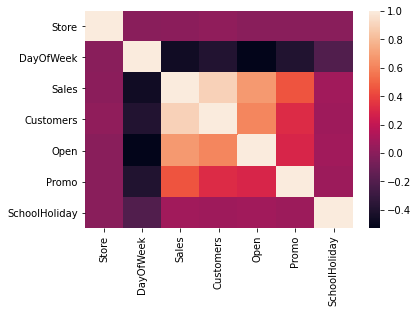

In [12]:
sns.heatmap(saleTrainDf.corr())

In [13]:
saleTrainDf.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [14]:
saleTrainDf.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


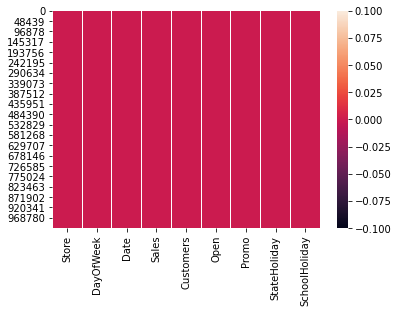

In [15]:
sns.heatmap(saleTrainDf.isnull())

In [16]:
saleTrainDf.describe()

# here the sales is 5773 avg 

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [42]:
storeInfoDf = pd.read_csv('/content/gdrive/My Drive/MLProjects/6RealLife/Sales/store.csv')

In [18]:
storeInfoDf.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


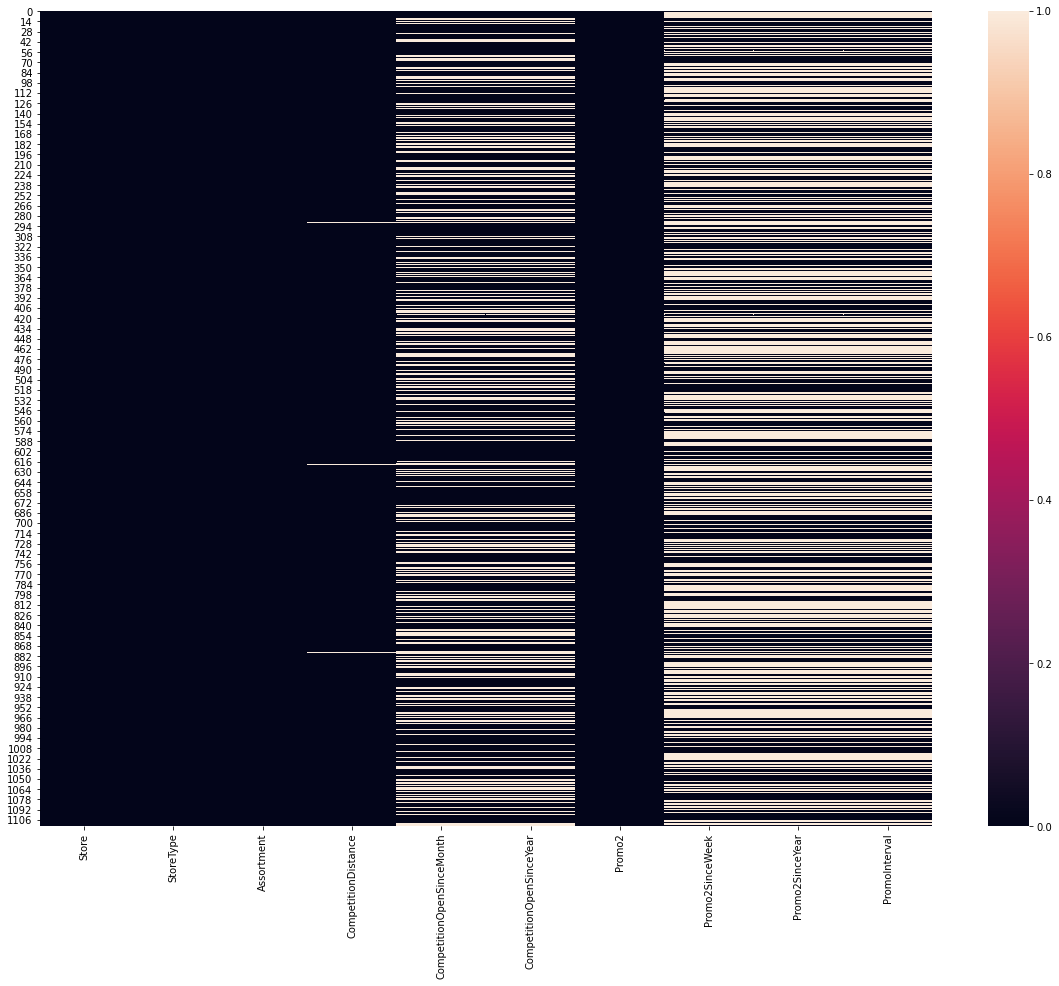

In [19]:
plt.figure(figsize=([20,15]))
sns.heatmap(storeInfoDf.isnull())

In [20]:
storeInfoDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [43]:
storeDf = storeInfoDf

In [22]:
storeDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [44]:
storeDf["Promo2SinceWeek"] = storeDf["Promo2SinceWeek"].replace(np.NaN, 0)

In [ ]:
storeDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,0.0,NaN,NaN


In [45]:



storeDf["PromoInterval"] = storeDf["PromoInterval"].replace(np.NaN, 0)

In [ ]:



storeDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,NaN,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,NaN,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,NaN,0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,NaN,0
1113,1114,a,c,870.0,NaN,NaN,0,0.0,NaN,0


<AxesSubplot:>

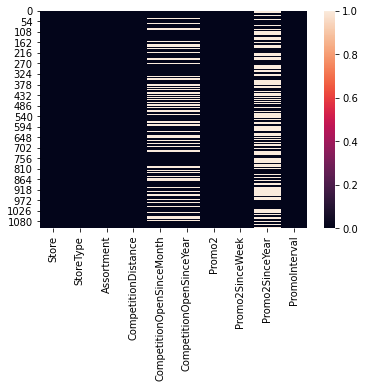

In [ ]:
sns.heatmap(storeDf.isnull())

In [ ]:
storeDf.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,1115.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,12.083408,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,15.542241,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,0.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,1.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,22.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
storeDf.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,NaN,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,NaN,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,NaN,0


C:\Users\Pia Keraliya\anaconda3\envs\tFlow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionDistance'>

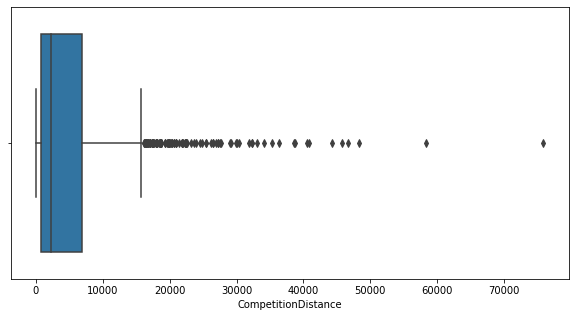

In [ ]:
plt.figure(figsize=([10,5]))
sns.boxplot(storeDf["CompetitionDistance"])

In [ ]:
saleTrainDf.shape

(1017209, 9)

<Figure size 1440x1080 with 0 Axes>

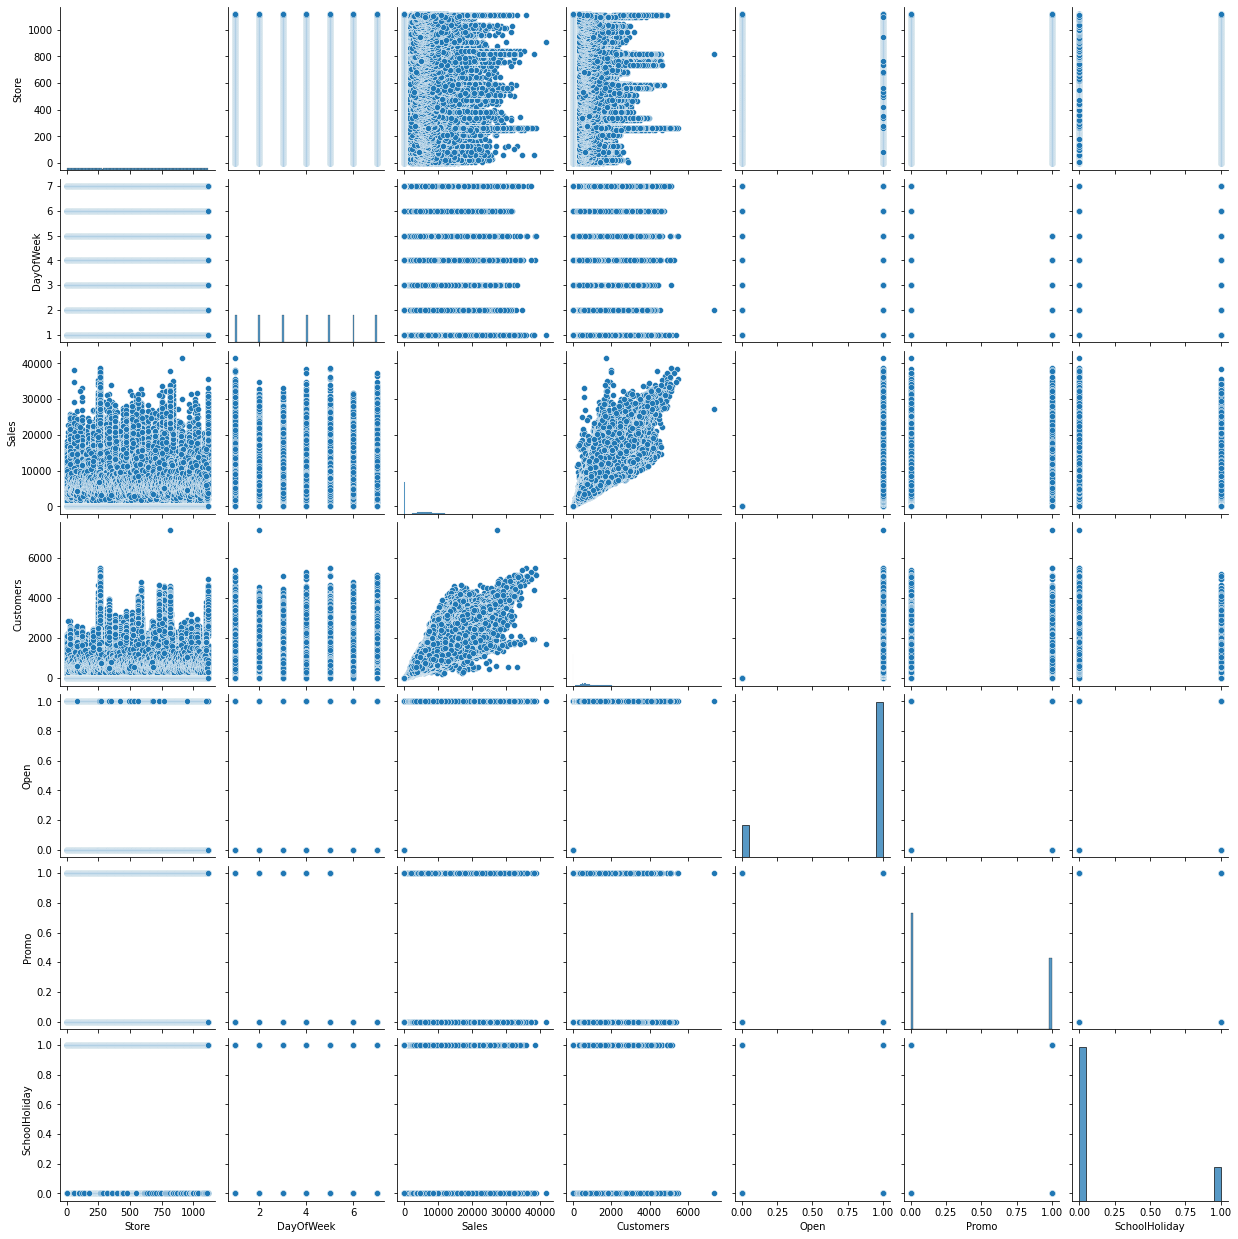

In [ ]:
plt.figure(figsize=([20,15]))
sns.pairplot(saleTrainDf)

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

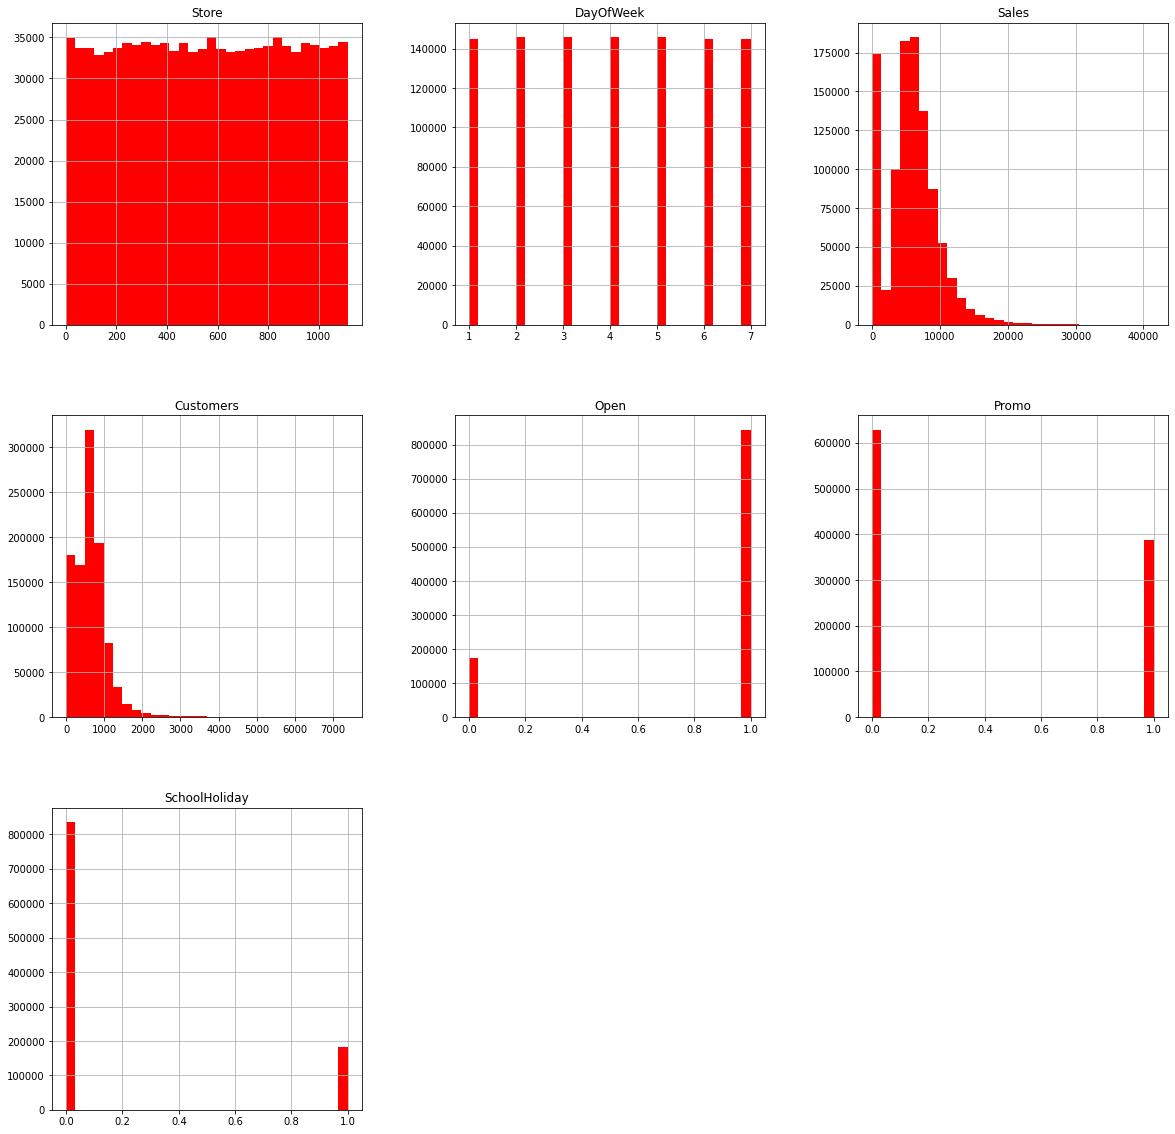

In [ ]:
#sales_train_df.hist(bins = 30, figsize = (20,20), color = 'r')
saleTrainDf.hist(bins=30 , figsize=(20,20), color = "r")

In [ ]:
saleTrainDf["Customers"].max()

7388

In [ ]:
saleTrainDf.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#number of store and close at the times.
saleTrainDf["Open"].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [46]:
closeStoreDf = saleTrainDf[saleTrainDf["Open"]==0]

In [47]:
openStoreDf = saleTrainDf[saleTrainDf["Open"]==1]

In [ ]:
#percentage of the store close
print("the percentage of store close ", len(closeStoreDf)/len(saleTrainDf)*100)

the percentage of store close  16.989330609540417


In [48]:
#now we the store is close the number of customer to the store is zero so there  is no sense to keep that column
#also now we can remove the open column as there are only open stores in the list.


saleTrainDf = openStoreDf

In [49]:
saleTrainDf

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [50]:
saleTrainDf.drop(["Open"],axis = 1 , inplace= True)

In [51]:
saleTrainDf

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [ ]:
saleTrainDf.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [ ]:
storeDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,NaN,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,NaN,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,NaN,0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,NaN,0
1113,1114,a,c,870.0,NaN,NaN,0,0.0,NaN,0


<AxesSubplot:>

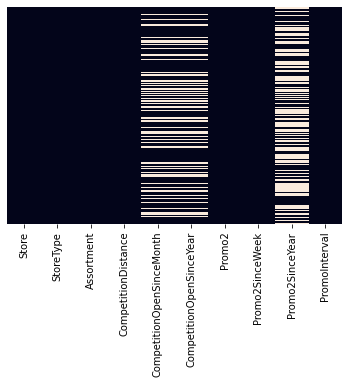

In [ ]:
sns.heatmap(storeDf.isnull(), yticklabels=False, cbar=False)

In [55]:
storeInfoDf = pd.read_csv('/content/gdrive/My Drive/MLProjects/6RealLife/Sales/store.csv')
storeInfoDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


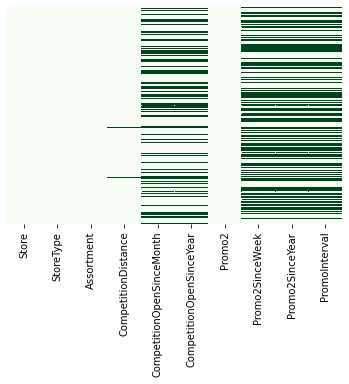

In [53]:
sns.heatmap(storeInfoDf.isnull(), yticklabels=False, cbar= False, cmap="Greens")

In [56]:
storeInfoDf[storeInfoDf["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [57]:
storeInfoDf[storeInfoDf["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [58]:
storeInfoDf[storeInfoDf["CompetitionOpenSinceYear"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [59]:
 storeInfoDf[storeInfoDf["Promo2"]==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


<AxesSubplot:>

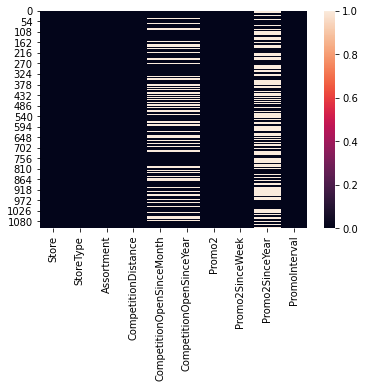

In [ ]:
sns.heatmap(storeDf.isnull())

In [60]:
storeDf["Promo2SinceYear"] = storeDf["Promo2SinceYear"].replace(np.NaN,0)

In [61]:
storeDf["CompetitionOpenSinceMonth"] = storeDf["CompetitionOpenSinceMonth"].replace(np.NaN, 0)

In [62]:
storeDf["CompetitionOpenSinceYear"] = storeDf["CompetitionOpenSinceYear"].replace(np.NaN, 0)

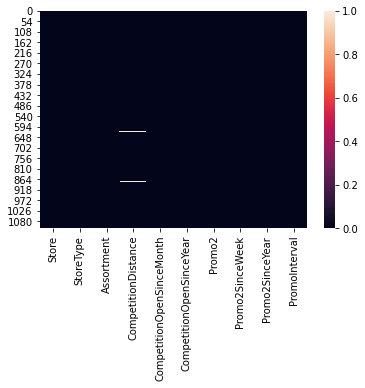

In [63]:
sns.heatmap(storeDf.isnull())

In [64]:
storeDf[storeDf["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,0.0,0.0,0,0.0,0.0,0
621,622,a,c,NaN,0.0,0.0,0,0.0,0.0,0
878,879,d,a,NaN,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [65]:
# now this distance can either be set the mean or mediam of the distance col as there is no point to set it to  zero. 
storeDf["CompetitionDistance"] = storeDf["CompetitionDistance"].fillna((storeDf["CompetitionDistance"]).mean(), inplace=True)

In [66]:
storeDf[storeDf["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,None,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,None,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,None,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,None,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,None,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,None,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,None,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,None,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,None,0.0,0.0,0,0.0,0.0,0


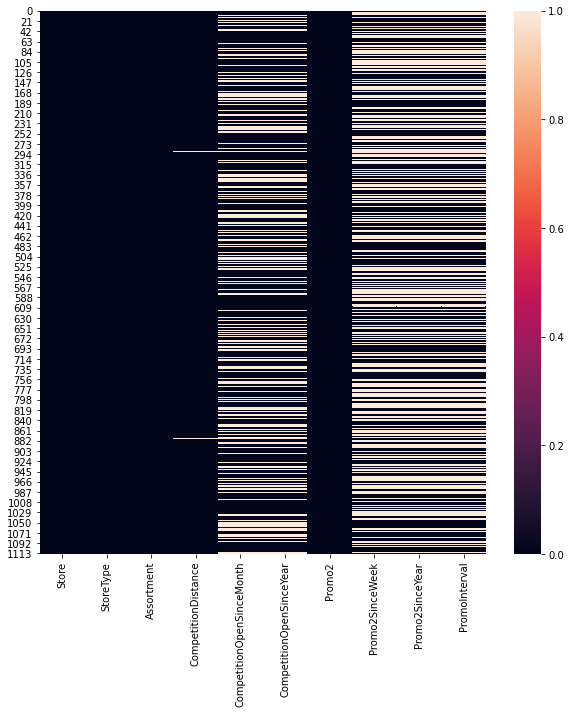

In [67]:
# messed up as all the value, so i have the backup DF
plt.figure(figsize=(10,10))
sns.heatmap(storeInfoDf.isnull())

In [ ]:
storeInfoDf.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [68]:
arrCat = ["CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]

for str1 in arrCat:
    storeInfoDf[str1].fillna(0, inplace = True)

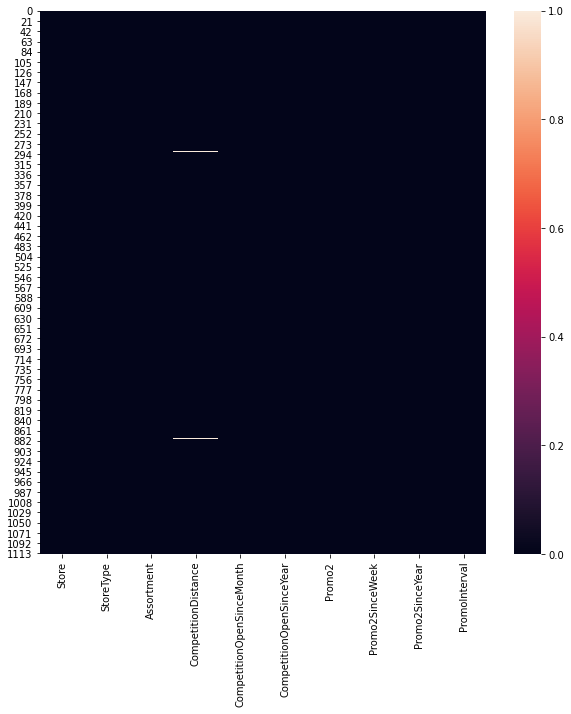

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(storeInfoDf.isnull())

In [70]:
storeInfoDf["CompetitionDistance"].fillna((storeInfoDf["CompetitionDistance"].mean()), inplace = True)

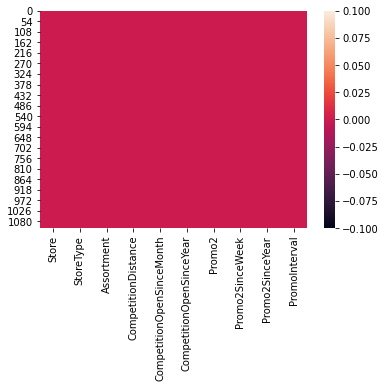

In [71]:
sns.heatmap(storeInfoDf.isnull())


In [40]:
storeInfoDf[storeInfoDf["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,NaN,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,NaN,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,NaN,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,NaN,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,NaN,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,NaN,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,NaN,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,NaN,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,NaN,0.0,0.0,0,0.0,0.0,0


In [ ]:
#all the NaN value are replaced either by zero or mean.


In [72]:
# now we will merge both the column using STORE col
saletrainAllDf = pd.merge(storeInfoDf, saleTrainDf, how="inner", on="Store")

In [73]:
saletrainAllDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1


In [ ]:
correlations = saletrainAllDf.corr()["Sales"].sort_values()
correlations


#promo is effective 
#promo2 is not at all effective and niether the day of the week
# while schoolholiday has higher impact


DayOfWeek                   -0.462125
Promo2SinceYear             -0.091056
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
CompetitionDistance         -0.019207
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Store                        0.005126
SchoolHoliday                0.085124
Promo                        0.452345
Customers                    0.894711
Sales                        1.000000
Name: Sales, dtype: float64

<AxesSubplot:>

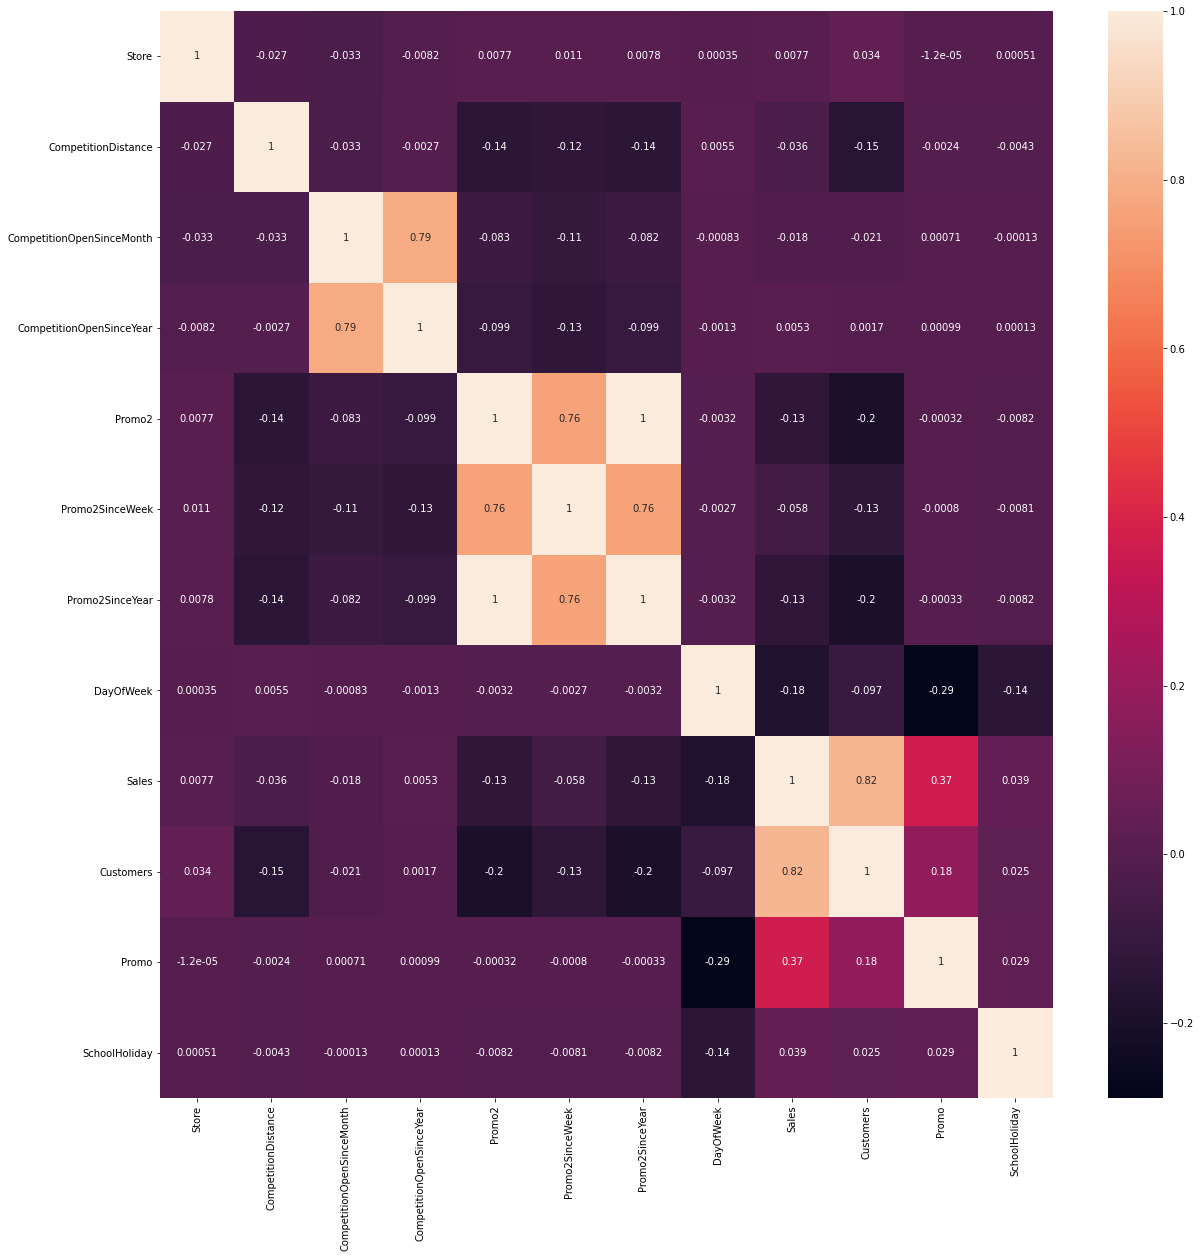

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(saletrainAllDf.corr(), annot=True)

In [ ]:
#backuping Df for experimentation
backupDf = saletrainAllDf

In [74]:
#separating date and year and month

saletrainAllDf["Year"] = pd.DatetimeIndex(saletrainAllDf["Date"]).year


In [75]:
saletrainAllDf["Month"] = pd.DatetimeIndex(saletrainAllDf["Date"]).month
saletrainAllDf["day"] = pd.DatetimeIndex(saletrainAllDf["Date"]).day

In [ ]:
saletrainAllDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Month,day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1,1,7
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1,1,5
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1,1,4
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1,1,3


In [76]:
saletrainAllDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1,2013,1,7
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1,2013,1,5
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1,2013,1,4
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1,2013,1,3


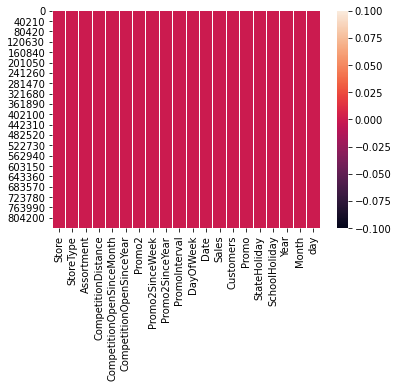

In [77]:
sns.heatmap(saletrainAllDf.isnull())

In [ ]:
#avg sale and number of customer per months
sns.countplot(x = "Sales", hue="Month",data=saletrainAllDf)


# false some error


KeyboardInterrupt: 

<AxesSubplot:xlabel='Month'>

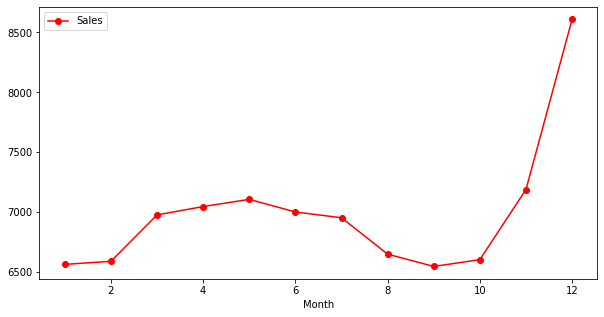

In [ ]:
axis = saletrainAllDf.groupby("Month")[["Sales"]].mean().plot(figsize=(10,5),marker="o",color = "r")
axis 

In [ ]:
axis

,Sales
Month,
1,6563.690444
2,6589.165535
3,6976.412026
4,7046.228420
5,7106.453154
6,7000.978190
7,6952.682125
8,6648.984654
9,6546.343035


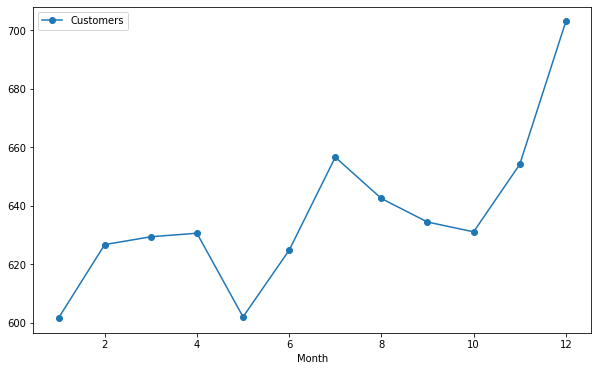

In [ ]:
# mean number of the customer in the month
meanCustomerMonthly = saletrainAllDf.groupby("Month")[["Customers"]].mean().plot(figsize = (10,6), marker = "o")


#customers tend to shop on the december more as it is the EROUPE data and christmax is celebrate there.


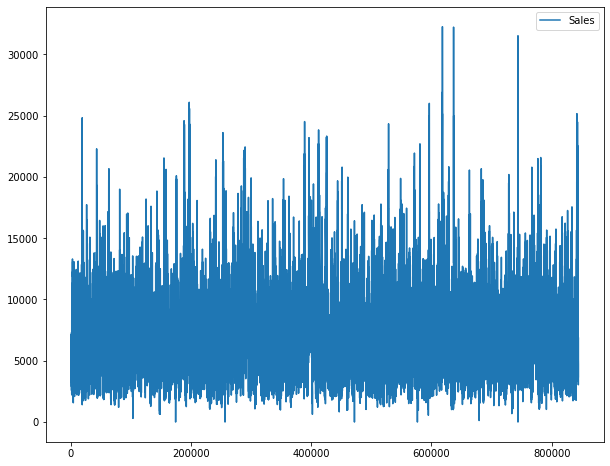

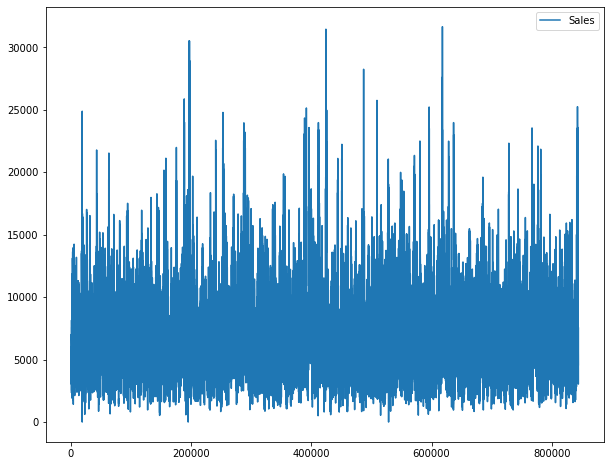

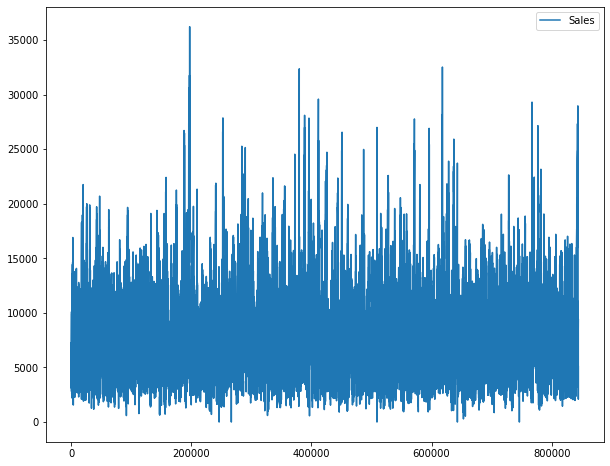

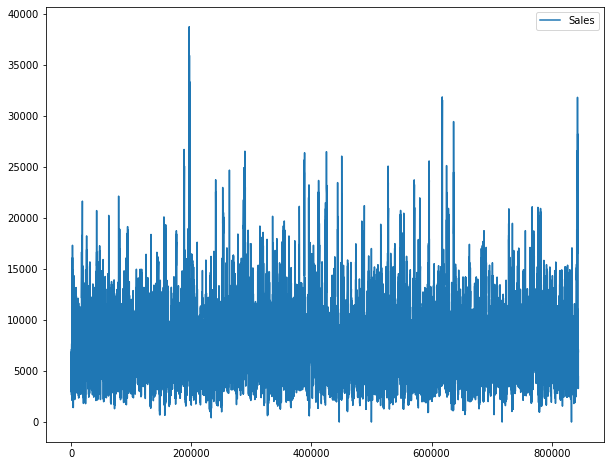

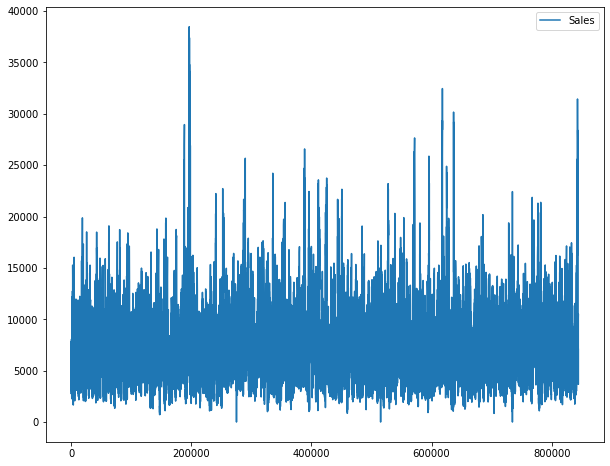

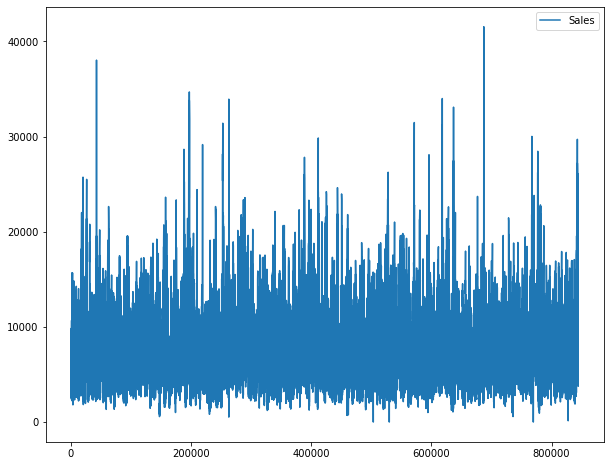

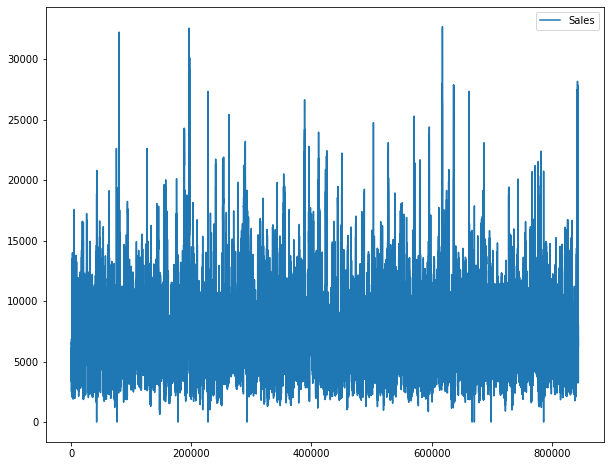

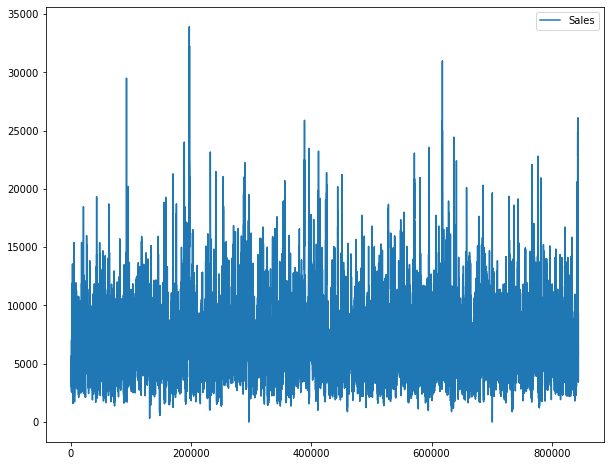

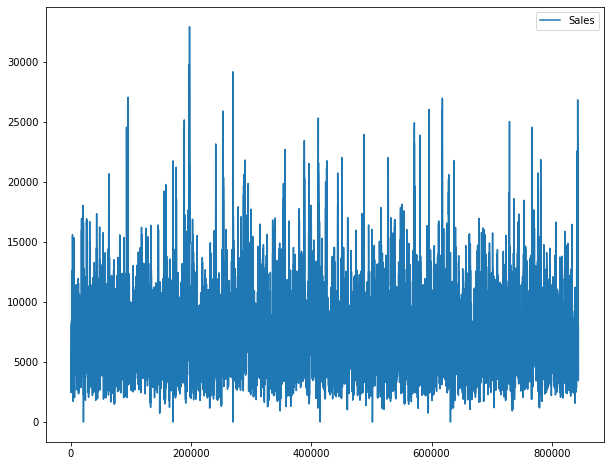

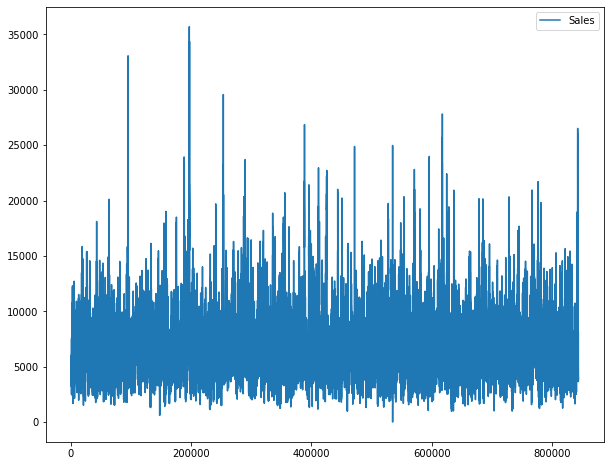

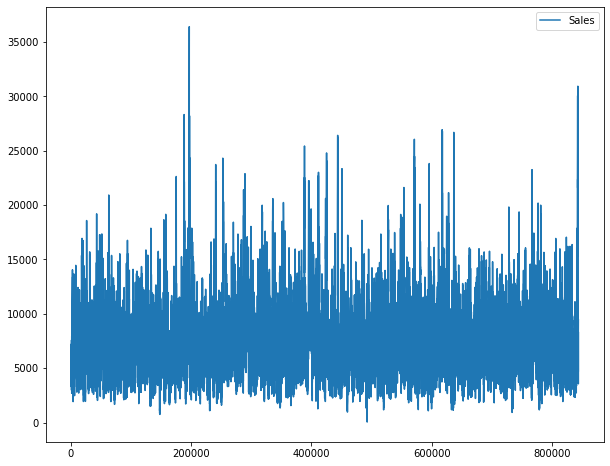

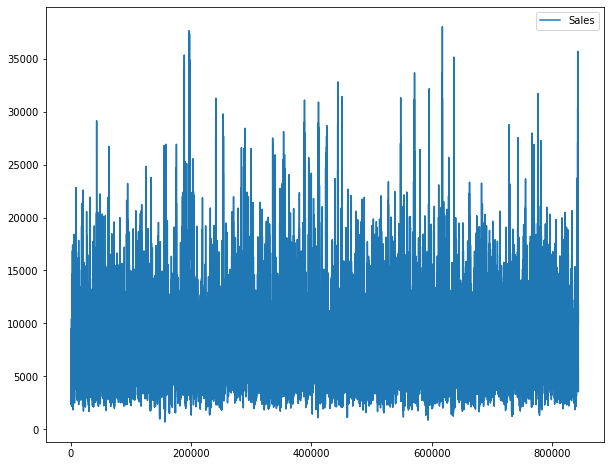

In [ ]:
axis2 = saletrainAllDf.groupby("Month")[["Sales"]].plot(figsize=(10,8))

#every month sales for each day


matplotlib.axes._subplots.AxesSubplot

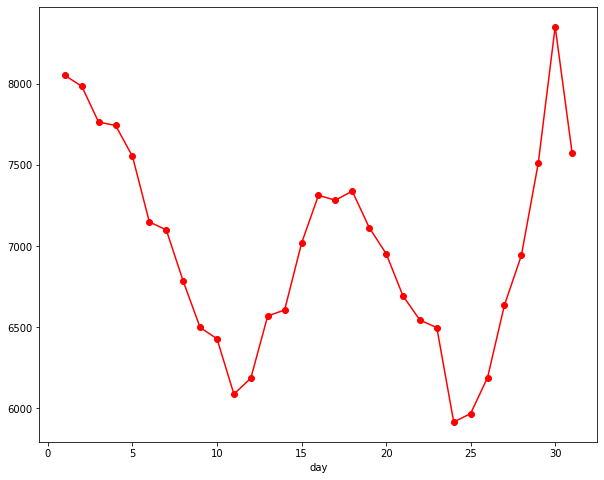

In [ ]:
#mean number of sale in the day 

axis3 = saletrainAllDf.groupby("day")["Sales"].mean().plot(figsize=(10,8), marker = "o", color = "r")

axis3
type(axis3)

# customers do shopping in the beginning and ending of the month


In [ ]:
#number of the customer per day in the month 

meanCustDay = saletrainAllDf.groupby("day")["Customers"].mean()
meanCustDay.sort_values()

day
24    686.380109
25    692.722889
11    707.363899
26    707.625764
12    712.577910
9     730.633183
27    733.561428
10    735.835861
22    738.651815
13    738.660208
14    738.946981
23    739.939982
21    742.814287
8     757.211580
28    757.671484
20    759.847311
15    763.165918
19    774.986834
7     776.275080
6     778.836139
16    778.993083
18    784.980902
17    785.059423
31    786.980533
29    789.575525
5     802.752484
3     818.100766
4     819.085296
2     842.344108
1     846.284593
30    861.253704
Name: Customers, dtype: float64

<AxesSubplot:xlabel='day'>

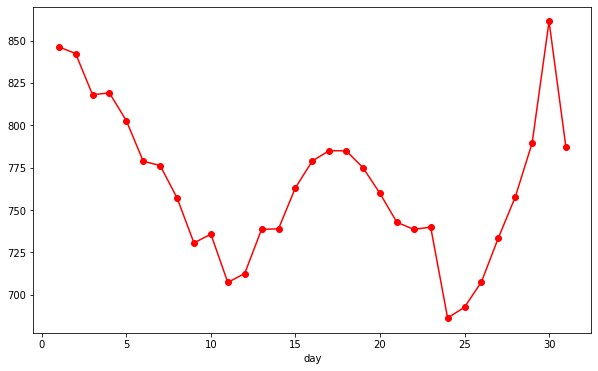

In [ ]:
meanCustDay.plot(figsize=(10,6), color = "r", marker= "o")


#customer tends to shop in the starting and ending of the month


In [ ]:
saletrainAllDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,6905,471,1,0,1,2013,1,7
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,4771,339,0,0,1,2013,1,5
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,4540,326,0,0,1,2013,1,4
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,4297,300,0,0,1,2013,1,3


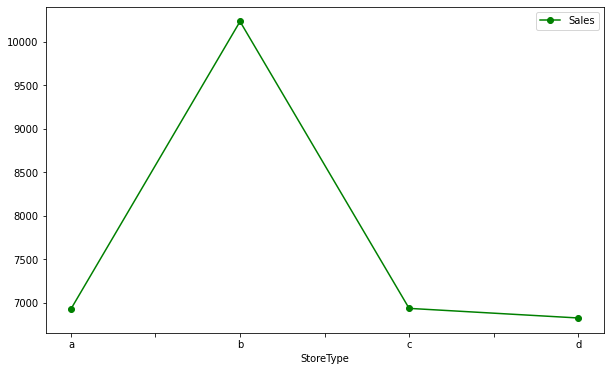

In [ ]:
# which type of store has the highest sale.
meanStoreSale = saletrainAllDf.groupby("StoreType")[["Sales"]].mean().plot(figsize = (10,6),marker = "o",color="g")


#type b store has highest sale

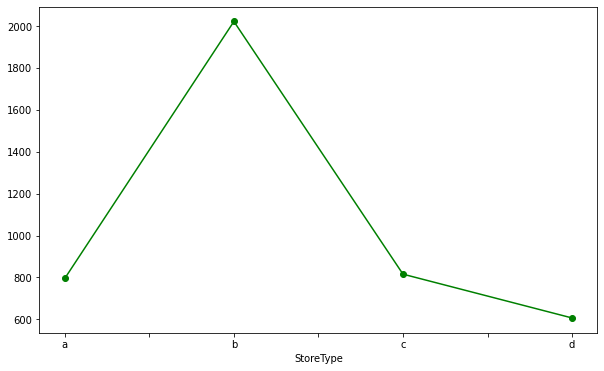

In [ ]:
#now lets check if the number of customer im the store b is also higest or not
meanStoreCust = saletrainAllDf.groupby("StoreType")["Customers"].mean().plot(figsize=(10,6), marker = "o", color = "g")


#yes the number of the customer is also highhest in  the Store B


<AxesSubplot:xlabel='Assortment'>

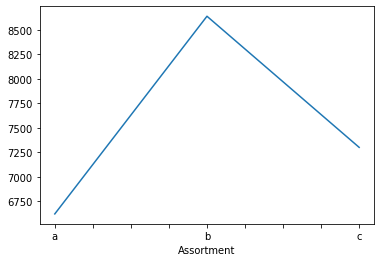

In [ ]:
# now lets see if the assortment can make the difference in the sale or not.

meanSaleAssort = saletrainAllDf.groupby("Assortment")["Sales"].mean().plot()
meanSaleAssort


# b stores that is basic stores has the highest sales

In [ ]:
# sales of the store who give the promo vs not gives the promo 
saletrainAllDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,6905,471,1,0,1,2013,1,7
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,4771,339,0,0,1,2013,1,5
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,4540,326,0,0,1,2013,1,4
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,4297,300,0,0,1,2013,1,3


<AxesSubplot:>

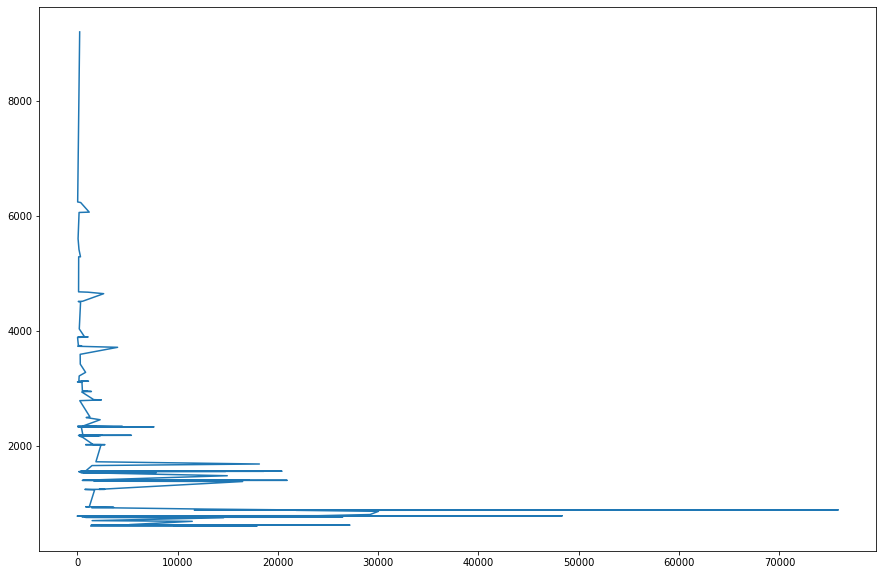

In [ ]:
saletrainAllDf["CompetitionDistance"].value_counts().plot(figsize = (15,10))

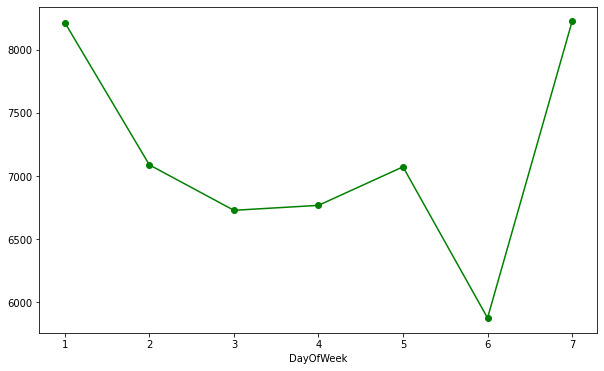

In [ ]:
# let group by the number of dayofWeek

meanStoreCust = saletrainAllDf.groupby("DayOfWeek")["Sales"].mean().plot(figsize=(10,6), marker = "o", color = "g")


# sunday and monday has the highest sale 
# here 7th is the sunday(give in the dataset)


In [ ]:
saletrainAllDf.groupby(["day","StoreType"]).mean()["Sales"].unstack().plot(ax= ax)

<AxesSubplot:xlabel='day'>

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

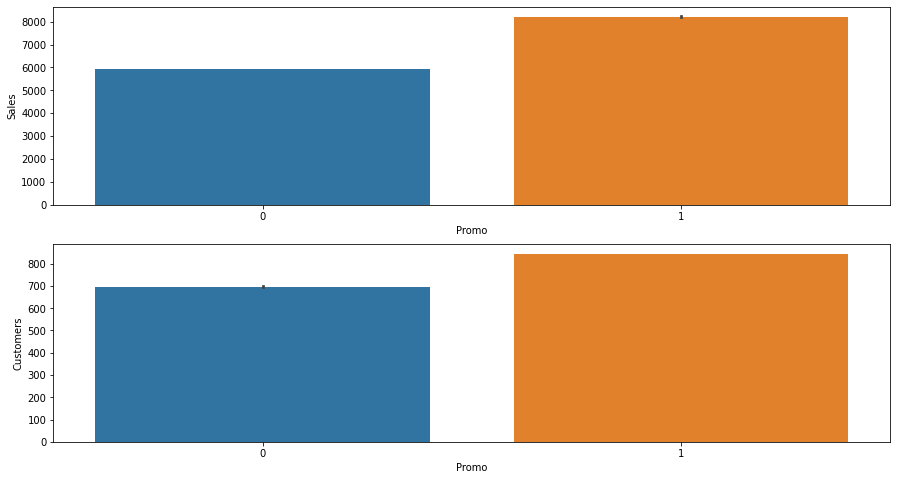

In [ ]:
plt.figure(figsize = (15,8))
plt.subplot(211)
sns.barplot(x = "Promo", y = "Sales", data=saletrainAllDf)
plt.subplot(212)
sns.barplot(x = "Promo", y = "Customers", data=saletrainAllDf)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

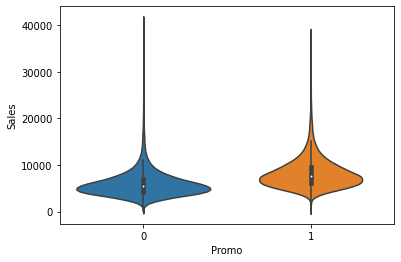

In [ ]:
sns.violinplot(x = "Promo", y = "Sales", data=saletrainAllDf)

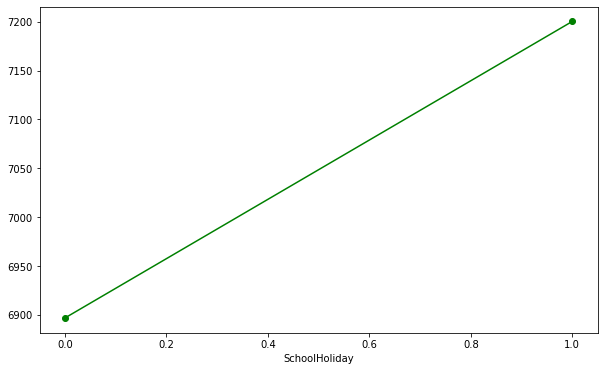

In [ ]:
meanHolidayCust = saletrainAllDf.groupby("SchoolHoliday")["Sales"].mean().plot(figsize=(10,6), marker = "o", color = "g")`

# schoolholiday has effect on the sales

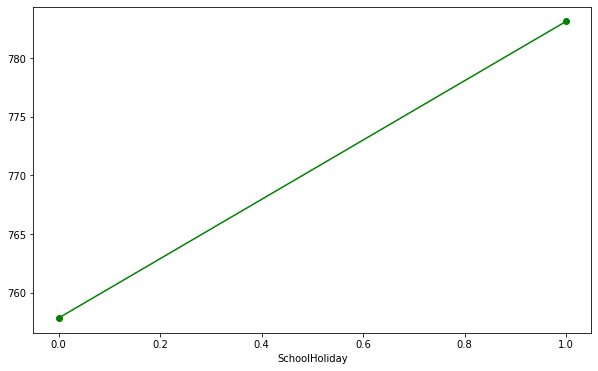

In [ ]:
meanHolidayCust = saletrainAllDf.groupby("SchoolHoliday")["Customers"].mean().plot(figsize=(10,6), marker = "o", color = "g")

In [80]:
saletrainAllDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1,2013,1,7
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1,2013,1,5
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1,2013,1,4
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1,2013,1,3


In [ ]:
# now actual modeling and the using FACEBOOK PROPHET to predict the sales.
# used in time series prediction where non-linear data is fit into yearly, monthly , dayly or seasonaly pr holiday effects
# it works best for the data having strong seasonal effect and sereval seasons of historical data
# the main motive to use this algo is because we have seasonal effect in our data i.e. christmax has higher sales
#

# it is additive regression model : series of fuction and now add them
# 4 elements
# piecewise linear , automatically picks , seasonal , weekly and holiday list

# timestamp = ds and target variable as y

In [82]:
fbprophet

<module 'fbprophet' from '/usr/local/lib/python3.7/dist-packages/fbprophet/__init__.py'>

In [84]:
from fbprophet import Prophet

In [91]:
saletrainAllDf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1,2013,1,7
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1,2013,1,5
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1,2013,1,4
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1,2013,1,3


In [94]:
  saleDf = saletrainAllDf[saletrainAllDf["Store"]==10]
  saleDf = saleDf[["Date","Sales"]].rename(columns = {"Date":"ds","Sales": "y" })
  saleDf = saleDf.sort_values("ds")
saleDf


,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675
7817,2013-01-04,5114
7816,2013-01-05,4256
7815,2013-01-07,7804
...,...,...
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186


In [97]:
  model = Prophet()
  model.fit(saleDf)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [101]:
 forecast = model.make_future_dataframe(periods = 60)

In [102]:
forecast

#here we have done the forcast

,ds
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-05
4,2013-01-07
...,...
839,2015-09-25
840,2015-09-26
841,2015-09-27
842,2015-09-28


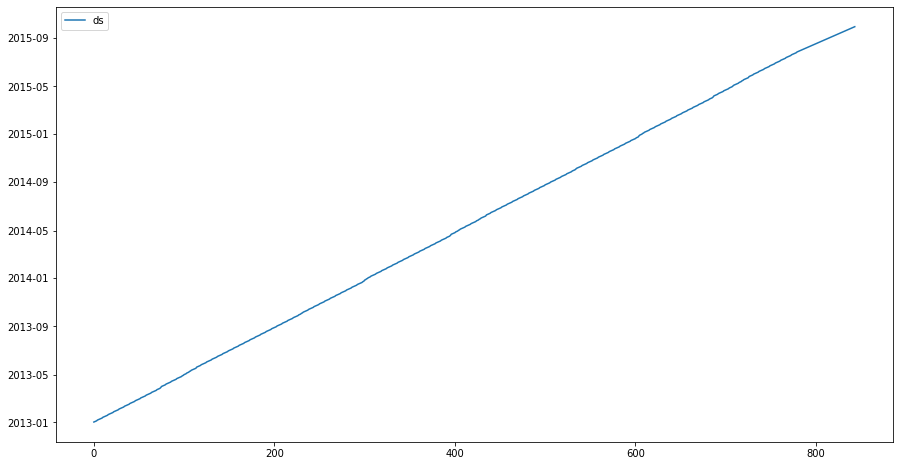

In [103]:
forecast.plot(figsize=(15,8))

In [ ]:
  model = Prophet()
  model.fit(saleDf)
  forecast = model.make_future_dataframe(periods = periods)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

KeyError: ignored

<Figure size 1296x432 with 0 Axes>

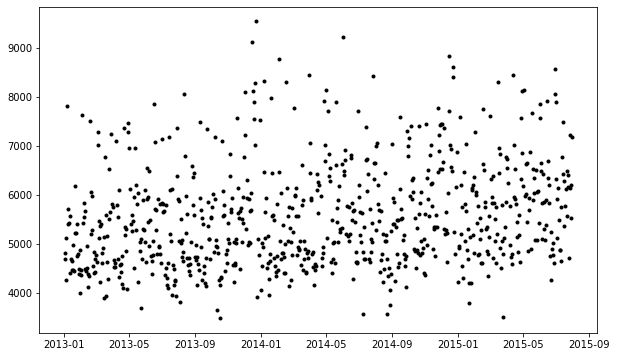

In [105]:
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

In [89]:
def salePrediction(StoreID, saleDf, periods):
  saleDf = saleDf[saleDf["Store"]==StoreID]
  saleDf = saleDf[["Date","Sales"]].rename(columns = {"Date":"ds","Sales": "y" })
  saleDf = saleDf.sort_values("ds")
  model = Prophet()
  model.fit(saleDf)
  forecast = model.make_future_dataframe(periods = periods)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyError: ignored

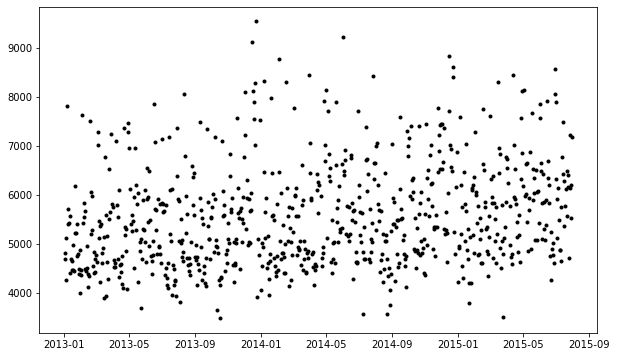

In [90]:
salePrediction(10,saletrainAllDf,60)

In [106]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
  
  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

In [107]:
schoolHolidays = saletrainAllDf[saletrainAllDf['SchoolHoliday'] == 1].loc[:, 'Date'].values
schoolHolidays.shape

(163457,)

In [108]:
stateHolidays = saletrainAllDf [ (saletrainAllDf['StateHoliday'] == 'a') | (saletrainAllDf['StateHoliday'] == 'b') | (saletrainAllDf['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
stateHolidays.shape

(910,)

In [109]:
stateHolidays = pd.DataFrame({'ds': pd.to_datetime(stateHolidays),
                               'holiday': 'state_holiday'})

In [111]:
schoolHolidays = pd.DataFrame({'ds': pd.to_datetime(schoolHolidays),
                                'holiday': 'school_holiday'})

In [112]:
schoolStateHolidays = pd.concat((stateHolidays, schoolHolidays))

In [113]:
schoolStateHolidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-01-07,school_holiday
163453,2013-01-05,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


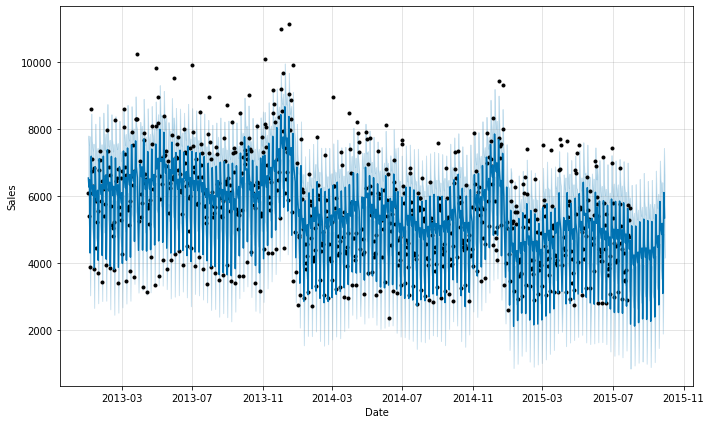

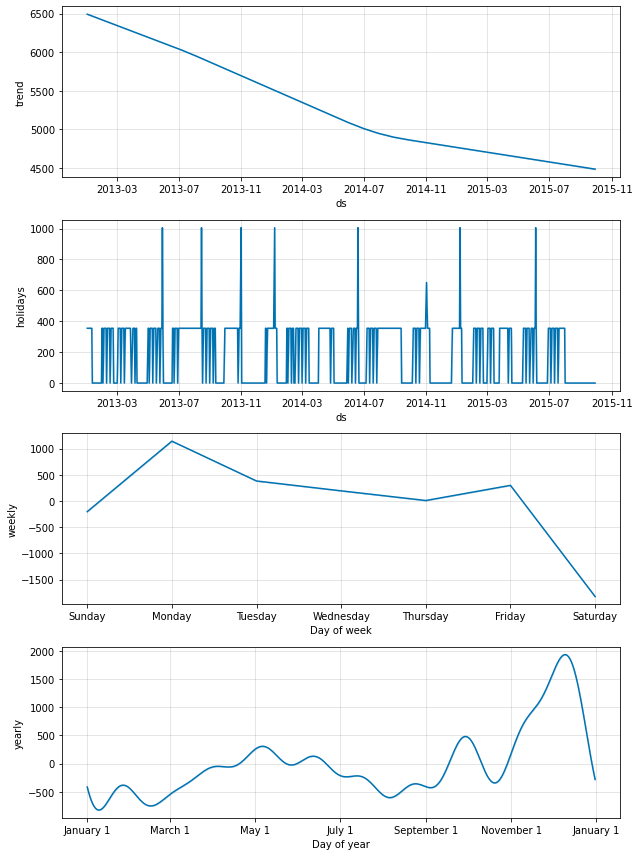

In [114]:
sales_prediction(6,saletrainAllDf,schoolStateHolidays,60)